In [2]:
#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#### Data Preprocessing:

##### Dataset splitting to test-set(bad) and train-set(good)

In [3]:
data = pd.read_csv('/mnt/c/Users/anast/Documents/GitHub/Diploma-Thesis/data/dataset.csv')

#Male --> 0, Female -->1
data['Sex'] = data['Sex'].replace(['M', 'F'],['0', '1'])
data = data.drop(['ID', 'Age'], axis=1)
df = data
df

,Sex,DLICV_baseline,MUSE_Volume_105,MUSE_Volume_137,MUSE_Volume_147,MUSE_Volume_179,MUSE_Volume_104,MUSE_Volume_136,MUSE_Volume_146,MUSE_Volume_178,...,MUSE_Volume_166,MUSE_Volume_117,MUSE_Volume_171,MUSE_Volume_116,MUSE_Volume_170,MUSE_Volume_38,MUSE_Volume_39,MUSE_Volume_71,MUSE_Volume_72,MUSE_Volume_73
0,0,1656609.000,1146.002049,2542.004545,4777.008542,3410.006098,2322.004152,2407.004304,5030.008994,4511.008066,...,4917.008792,2267.004054,3625.006482,2477.004429,3501.006260,58235.104132,54987.098324,5275.009432,2618.004681,2947.005270
1,1,1261114.375,1405.995977,2333.993322,3392.990293,2312.993382,1790.994876,2256.993543,3267.990650,2168.993794,...,2599.992561,2230.993617,3251.990696,2356.993257,3538.989875,46979.865589,45422.870044,3577.989763,1513.995668,2487.992882
2,0,1650097.875,2220.005293,3179.007579,4664.011120,2956.007048,2229.005314,1915.004566,4423.010545,2981.007107,...,3986.009503,2873.006850,3996.009527,3328.007935,4173.009949,58222.138812,57164.136290,5240.012493,1941.004628,3397.008099
3,1,1363480.875,1316.006589,2126.010644,4411.022085,2893.014485,2475.012392,2026.010144,3802.019036,3269.016367,...,3598.018014,2496.012497,3762.018836,2556.012797,3349.016768,48066.240656,47532.237983,3981.019932,2005.010039,2495.012492
4,1,1213169.000,1662.006934,2020.008428,3351.013981,1691.007055,1572.006559,1604.006692,3137.013089,2775.011578,...,3074.012826,1668.006959,2803.011695,2097.008749,3311.013815,42303.176502,42434.177048,3101.012938,1589.006630,2143.008941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,1,1316014.125,1334.005248,1961.007714,3907.015370,3080.012116,1990.007828,1855.007297,4260.016758,3377.013285,...,3229.012703,2025.007966,3543.013938,2635.010366,3354.013194,52728.207427,50748.199638,4365.017172,1764.006939,2792.010983
4513,0,1377035.500,1516.995027,1078.996463,3799.987543,2317.992401,1393.995430,1815.994047,3620.988129,2750.990982,...,3612.988156,2745.990998,3976.986962,2829.990723,4207.986205,56527.814687,52999.826252,5020.983540,1894.993788,2956.990306
4514,1,1223616.125,1469.996495,1830.995635,3093.992623,2533.993958,1695.995956,2225.994693,3768.991014,2425.994216,...,3453.991765,2264.994600,3236.992282,2369.994349,3120.992559,48181.885125,45967.890404,4809.988532,1834.995625,2785.993358
4515,0,1495388.875,2108.012565,2363.014085,5017.029904,2878.017154,2418.014412,1986.011837,4119.024551,4388.026155,...,3929.023419,2419.014418,3952.023556,2301.013715,3855.022978,52830.314891,53244.317359,5341.031835,1991.011867,3552.021172


In [4]:
#generated data // bad_data - test set
# Select a subset of rows and columns to reduce // atrophy simulation
test_df = df.sample(frac=0.5)  # Adjust fraction as needed

#outer join for independent test set
good_df = pd.merge(df, test_df, indicator=True, how='outer').query('_merge == "left_only"').drop(columns=['_merge'])
good_df.dropna()

,Sex,DLICV_baseline,MUSE_Volume_105,MUSE_Volume_137,MUSE_Volume_147,MUSE_Volume_179,MUSE_Volume_104,MUSE_Volume_136,MUSE_Volume_146,MUSE_Volume_178,...,MUSE_Volume_166,MUSE_Volume_117,MUSE_Volume_171,MUSE_Volume_116,MUSE_Volume_170,MUSE_Volume_38,MUSE_Volume_39,MUSE_Volume_71,MUSE_Volume_72,MUSE_Volume_73
1,1,1261114.375,1405.995977,2333.993322,3392.990293,2312.993382,1790.994876,2256.993543,3267.990650,2168.993794,...,2599.992561,2230.993617,3251.990696,2356.993257,3538.989875,46979.865589,45422.870044,3577.989763,1513.995668,2487.992882
2,0,1650097.875,2220.005293,3179.007579,4664.011120,2956.007048,2229.005314,1915.004566,4423.010545,2981.007107,...,3986.009503,2873.006850,3996.009527,3328.007935,4173.009949,58222.138812,57164.136290,5240.012493,1941.004628,3397.008099
3,1,1363480.875,1316.006589,2126.010644,4411.022085,2893.014485,2475.012392,2026.010144,3802.019036,3269.016367,...,3598.018014,2496.012497,3762.018836,2556.012797,3349.016768,48066.240656,47532.237983,3981.019932,2005.010039,2495.012492
10,0,1417768.875,2032.998304,2300.998080,4603.996158,3387.997173,1676.998601,1748.998541,4466.996272,3578.997013,...,3251.997286,2311.998071,3779.996846,2537.997882,3719.996896,56418.952920,56188.953112,4064.996608,1544.998711,2488.997923
12,1,1263699.875,1290.996768,2576.993549,3938.990139,1705.995729,1247.996876,1951.995113,3779.990537,2111.994713,...,3605.990973,1656.995852,3433.991403,2075.994803,3393.991503,49697.875586,48872.877652,4204.989473,2077.994798,2493.993757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,1,1400990.625,1635.990249,2302.986273,4105.975526,2998.982125,1782.989372,1797.989283,4346.974090,3030.981934,...,3237.980700,2433.985492,3585.978626,2232.986690,3643.978280,52828.685115,51540.692792,4736.971765,2188.986953,2869.982893
4511,0,1500395.875,1435.994180,2656.989231,4592.981384,3410.986175,1447.994131,2238.990925,4550.981554,3320.986540,...,3934.984051,3573.985514,3708.984967,2730.988931,3410.986175,61205.751925,61829.749396,4512.981708,2460.990025,3494.985834
4512,1,1316014.125,1334.005248,1961.007714,3907.015370,3080.012116,1990.007828,1855.007297,4260.016758,3377.013285,...,3229.012703,2025.007966,3543.013938,2635.010366,3354.013194,52728.207427,50748.199638,4365.017172,1764.006939,2792.010983
4514,1,1223616.125,1469.996495,1830.995635,3093.992623,2533.993958,1695.995956,2225.994693,3768.991014,2425.994216,...,3453.991765,2264.994600,3236.992282,2369.994349,3120.992559,48181.885125,45967.890404,4809.988532,1834.995625,2785.993358


In [5]:
#Divide the dataset to brain regions
#FRONTAL
frontal_upper_limit = test_df.columns.get_loc('MUSE_Volume_174')
frontal_lower_limit = test_df.columns.get_loc('MUSE_Volume_105')

#OCCIPITAL
occipital_lower_limit = test_df.columns.get_loc('MUSE_Volume_161')
occipital_upper_limit = test_df.columns.get_loc('MUSE_Volume_134')

#TEMPORAL
temporal_lower_limit = test_df.columns.get_loc('MUSE_Volume_123')
temporal_upper_limit = test_df.columns.get_loc('MUSE_Volume_206')

#PARIETAL
parietal_lower_limit = test_df.columns.get_loc('MUSE_Volume_107')
parietal_upper_limit = test_df.columns.get_loc('MUSE_Volume_168')

#DEEP_WM_GM
deep_wm_gm_lower_limit = test_df.columns.get_loc('MUSE_Volume_30')
deep_wm_gm_upper_limit = test_df.columns.get_loc('MUSE_Volume_47')

#LIMBIC
limbic_lower_limit = test_df.columns.get_loc('MUSE_Volume_101')
limbic_upper_limit = test_df.columns.get_loc('MUSE_Volume_170')

#CEREBELLUM
cerebellum_lower_limit = test_df.columns.get_loc('MUSE_Volume_38')
cerebellum_upper_limit = test_df.columns.get_loc('MUSE_Volume_73') 

In [6]:
#Atrophy simulation

#Generate factors to multiply the selected values, adjust limits as needed
frontal_factors = np.random.uniform(0.85, 1, size=(test_df.shape[0], frontal_upper_limit+1))
occipital_factors = np.random.uniform(0.85, 1, size=(test_df.shape[0], 1+occipital_upper_limit))
temporal_factors = np.random.uniform(0.85, 1, size=(test_df.shape[0], 1+temporal_upper_limit))
parietal_factors = np.random.uniform(0.85, 1, size=(test_df.shape[0], 1+parietal_upper_limit))
deep_wm_gm_factors = np.random.uniform(1, 1, size=(test_df.shape[0], 1+deep_wm_gm_upper_limit))
limbic_factors = np.random.uniform(1, 1, size=(test_df.shape[0], 1+limbic_upper_limit))
cerebellum_factors = np.random.uniform(1, 1, size=(test_df.shape[0], 1+cerebellum_upper_limit))

#frontal , atrophy in first 450 subjects
for j in range(frontal_lower_limit, frontal_upper_limit):
    for i in range(0, 450):
        test_df.iloc[i, j] *= frontal_factors[i, j]

#occipital
for j in range(occipital_lower_limit, occipital_upper_limit+1):
    for i in range(450, 900):
        test_df.iloc[i, j] *= occipital_factors[i, j]

#temporal
for j in range(temporal_lower_limit, temporal_upper_limit+1):
    for i in range(900, 1350):
        test_df.iloc[i, j] *= temporal_factors[i, j]

#parietal
for j in range(parietal_lower_limit, parietal_upper_limit+1):
    for i in range(1350, 1800):
        test_df.iloc[i, j] *= parietal_factors[i, j]

#deep_wm_gm
for j in range(deep_wm_gm_lower_limit, deep_wm_gm_upper_limit+1):
    for i in range(0, test_df.shape[0]):
        test_df.iloc[i, j] *= deep_wm_gm_factors[i, j]

#limbic
for j in range(limbic_lower_limit, limbic_upper_limit+1):
    for i in range(0, test_df.shape[0]):
        test_df.iloc[i, j] *= limbic_factors[i, j]

#cerebellum
for j in range(cerebellum_lower_limit, cerebellum_upper_limit+1):
    for i in range(0, test_df.shape[0]):
        test_df.iloc[i, j] *= cerebellum_factors[i, j]

bad_df=test_df.dropna()

In [7]:
#add labels for atrophy pattern
new_column_values = ['frontal'] * 450 + ['occipital'] * 450 + ['temporal'] * 450 + ['parietal'] * 450 +  ['NA'] * (test_df.shape[0] - 1800)
test_df['pattern'] = new_column_values

In [8]:
#check for statistical significant difference in specific atrophy sub-dataset, i.e. temporal
from scipy.stats import ttest_ind
for j in range(temporal_lower_limit, temporal_upper_limit + 1):
    col1 = good_df.iloc[:, j] 
    col2 = [test_df.iloc[i, j] for i in range (901,1351)]
    t_statistic, p_value = ttest_ind(col1, col2)
    print(f"T-test between column {j} of goof_df and test_df:")
    print(f"  T-statistic: {t_statistic}")
    print(f"  P-value: {p_value}")

T-test between column 62 of goof_df and test_df:
  T-statistic: 8.977007083667365
  P-value: 5.083427973031954e-19
T-test between column 63 of goof_df and test_df:
  T-statistic: 9.32862577135565
  P-value: 2.160866400084466e-20
T-test between column 64 of goof_df and test_df:
  T-statistic: 9.167256498871449
  P-value: 9.334007365822011e-20
T-test between column 65 of goof_df and test_df:
  T-statistic: 10.705805054792199
  P-value: 3.175952833113726e-26
T-test between column 66 of goof_df and test_df:
  T-statistic: 8.532476606947862
  P-value: 2.3478180992849744e-17
T-test between column 67 of goof_df and test_df:
  T-statistic: 10.708886644950569
  P-value: 3.0761579557067405e-26
T-test between column 68 of goof_df and test_df:
  T-statistic: 10.224197917141051
  P-value: 4.211517618579093e-24
T-test between column 69 of goof_df and test_df:
  T-statistic: 10.1876653777056
  P-value: 6.0510868017061356e-24
T-test between column 70 of goof_df and test_df:
  T-statistic: 10.215910156

##### DLICV Correction

###### Correction Good data

Text(0.5, 29.140624999999986, 'Intracranial Volume')

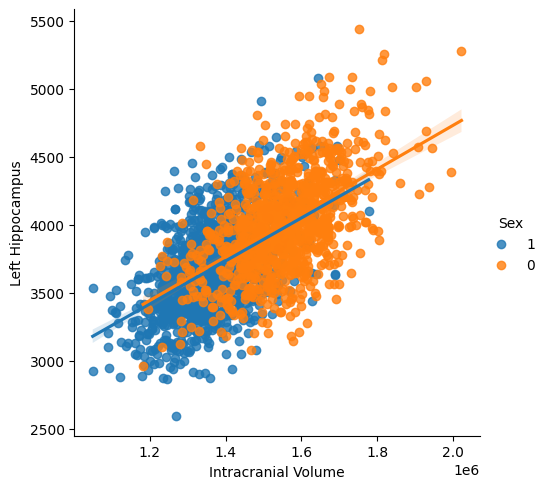

In [9]:
sns.lmplot(data=good_df, x='DLICV_baseline', y='MUSE_Volume_48', hue='Sex')
plt.ylabel('Left Hippocampus')
plt.xlabel('Intracranial Volume')

In [10]:
#Adjustment for confounders using Linean Regression

# Step 1: Split the good_df
# Assume 'predictor_column' is the column you want to use as the predictor (regressor)
good_residuals_df = good_df
predictor_column = 'DLICV_baseline'
specific_column = 'Sex'
target_columns = [col for col in good_df.columns if col != predictor_column and col != specific_column and col != 'pattern']


X = good_df[[predictor_column]]
y = good_df[target_columns]

# Step 2: Create and Train the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Create a linear regression model for each target variable
models = {}
for target in target_columns:
    model = LinearRegression()
    model.fit(X_train, y_train[target])
    models[target] = model

# Step 3: replace the values with residuals values
for target, model in models.items():
    y_pred = model.predict(X_test)
    good_residuals_df[target] = y_test[target] - y_pred

# Step 4: Interpret the Results
# Interpret the coefficients of the linear regression model
for target, model in models.items():
    print(f"Target Variable: {target}")
    print(f"Coefficient: {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print()

Target Variable: MUSE_Volume_105
Coefficient: 0.0011701622742101268
Intercept: -73.96717974299804

Target Variable: MUSE_Volume_137
Coefficient: 0.0012851831267500415
Intercept: 404.03547160770836

Target Variable: MUSE_Volume_147
Coefficient: 0.00320099947530472
Intercept: -346.3006353568953

Target Variable: MUSE_Volume_179
Coefficient: 0.0019203596811561004
Intercept: 213.68051912875353

Target Variable: MUSE_Volume_104
Coefficient: 0.0013772507092180148
Intercept: -5.593083962765604

Target Variable: MUSE_Volume_136
Coefficient: 0.001390359775891717
Intercept: 98.47555429212525

Target Variable: MUSE_Volume_146
Coefficient: 0.0029003740724643837
Intercept: 114.48984592419583

Target Variable: MUSE_Volume_178
Coefficient: 0.002063785550418444
Intercept: 165.131013715059

Target Variable: MUSE_Volume_103
Coefficient: 0.0022017233427024203
Intercept: 1043.117715672311

Target Variable: MUSE_Volume_173
Coefficient: 0.0011393444746101082
Intercept: 588.1056646791376

Target Variable: MU

In [11]:
#shifting values
min_value = np.zeros(len(target_columns))
for i, target in enumerate(target_columns):
    min_value[i] = good_residuals_df[target].min()
    if min_value[i] < 0:
        good_residuals_df.loc[:, target] = good_residuals_df[target] - min_value[i]
good_df = good_residuals_df.dropna()        

Text(0.5, 29.140624999999986, 'Intracranial Volume')

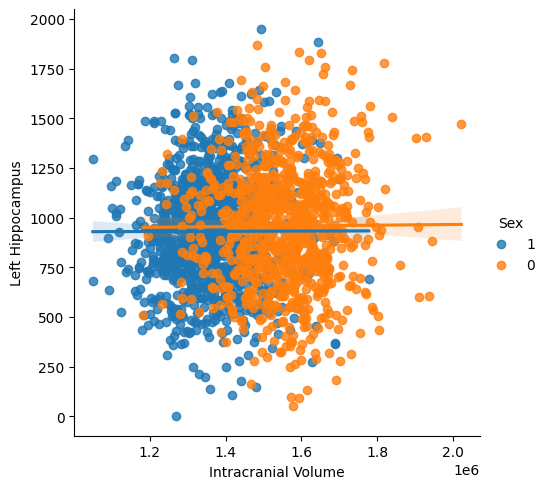

In [12]:
sns.lmplot(data=good_df, x='DLICV_baseline', y='MUSE_Volume_48', hue='Sex')
plt.ylabel('Left Hippocampus')
plt.xlabel('Intracranial Volume')

###### Correction bad data

Text(0.5, 29.140624999999986, 'Intracranial Volume')

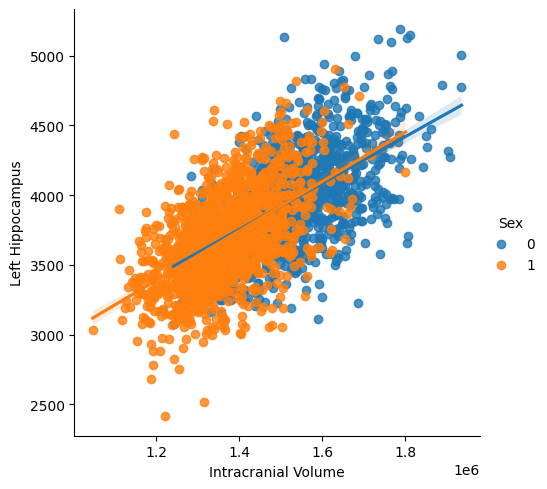

In [13]:
sns.lmplot(data=bad_df, x='DLICV_baseline', y='MUSE_Volume_48', hue='Sex')
plt.ylabel('Left Hippocampus')
plt.xlabel('Intracranial Volume')

In [14]:
# Step 1: Split the test_df
# Assume 'predictor_column' is the column you want to use as the predictor (regressor)
bad_residuals_df = bad_df
predictor_column = 'DLICV_baseline'
specific_column = 'Sex'
target_columns = [col for col in test_df.columns if col != predictor_column and col != specific_column and col != 'pattern']

X_test = test_df[[predictor_column]]
y_test = test_df[target_columns]

# Step 2: replace the values with residuals values, same models
for target, model in models.items():
    y_pred = model.predict(X_test)
    bad_residuals_df[target] = y_test[target] - y_pred
    
# Step 3: Interpret the Results
# Interpret the coefficients of the linear regression model
for target, model in models.items():
    print(f"Target Variable: {target}")
    print(f"Coefficient: {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print()

Target Variable: MUSE_Volume_105
Coefficient: 0.0011701622742101268
Intercept: -73.96717974299804

Target Variable: MUSE_Volume_137
Coefficient: 0.0012851831267500415
Intercept: 404.03547160770836

Target Variable: MUSE_Volume_147
Coefficient: 0.00320099947530472
Intercept: -346.3006353568953

Target Variable: MUSE_Volume_179
Coefficient: 0.0019203596811561004
Intercept: 213.68051912875353

Target Variable: MUSE_Volume_104
Coefficient: 0.0013772507092180148
Intercept: -5.593083962765604

Target Variable: MUSE_Volume_136
Coefficient: 0.001390359775891717
Intercept: 98.47555429212525

Target Variable: MUSE_Volume_146
Coefficient: 0.0029003740724643837
Intercept: 114.48984592419583

Target Variable: MUSE_Volume_178
Coefficient: 0.002063785550418444
Intercept: 165.131013715059

Target Variable: MUSE_Volume_103
Coefficient: 0.0022017233427024203
Intercept: 1043.117715672311

Target Variable: MUSE_Volume_173
Coefficient: 0.0011393444746101082
Intercept: 588.1056646791376

Target Variable: MU

In [15]:
#shifting values based on good_residuals_df
for i, target in enumerate(target_columns):
    bad_residuals_df.loc[:, target] = bad_residuals_df[target] - min_value[i]
test_df = bad_residuals_df.dropna()

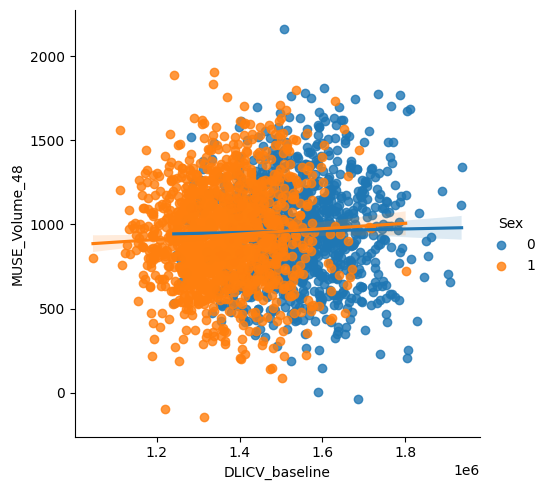

In [16]:
#sns.lmplot(data=frontal_bad_df_residuals, x='DLICV_baseline', y='MUSE_Volume_48', hue='Sex')
sns.lmplot(data=test_df, x='DLICV_baseline', y='MUSE_Volume_48', hue='Sex')

##### Scaling:

In [17]:
scaler = StandardScaler()

good_df = good_df.drop(['Sex', 'DLICV_baseline'], axis=1)
x_good = scaler.fit_transform(good_df)
df_scaled = pd.DataFrame(x_good, columns=good_df.columns)

In [18]:
#bad data
test_df = test_df.drop(['Sex', 'DLICV_baseline'], axis=1)

x_bad = scaler.transform(test_df)  #only transform
test_df_scaled = pd.DataFrame(x_bad, columns=test_df.columns)

In [19]:
#recalculation of the limits
#FRONTAL
frontal_upper_limit = test_df.columns.get_loc('MUSE_Volume_174')
frontal_lower_limit = test_df.columns.get_loc('MUSE_Volume_105')

#OCCIPITAL
occipital_lower_limit = test_df.columns.get_loc('MUSE_Volume_161')
occipital_upper_limit = test_df.columns.get_loc('MUSE_Volume_134')

#TEMPORAL
temporal_lower_limit = test_df.columns.get_loc('MUSE_Volume_123')
temporal_upper_limit = test_df.columns.get_loc('MUSE_Volume_206')

#PARIETAL
parietal_lower_limit = test_df.columns.get_loc('MUSE_Volume_107')
parietal_upper_limit = test_df.columns.get_loc('MUSE_Volume_168')

#DEEP_WM_GM
deep_wm_gm_lower_limit = test_df.columns.get_loc('MUSE_Volume_30')
deep_wm_gm_upper_limit = test_df.columns.get_loc('MUSE_Volume_47')

#LIMBIC
limbic_lower_limit = test_df.columns.get_loc('MUSE_Volume_101')
limbic_upper_limit = test_df.columns.get_loc('MUSE_Volume_170')

#CEREBELLUM
cerebellum_lower_limit = test_df.columns.get_loc('MUSE_Volume_38')
cerebellum_upper_limit = test_df.columns.get_loc('MUSE_Volume_73')

#### Autoencoders 

In [20]:
x_good_train, x_good_val = train_test_split(
    x_good, test_size=0.25, random_state=42)
print(x_good.shape[1])

119


In [21]:
#creating an array of dictionaries
regions = [
    {
        "name": "FRONTAL",
        "lower_limit": frontal_lower_limit,
        "upper_limit": frontal_upper_limit
    },
    {
        "name": "OCCIPITAL",
        "lower_limit": occipital_lower_limit,
        "upper_limit": occipital_upper_limit
    },
    {
        "name": "TEMPORAL",
        "lower_limit": temporal_lower_limit,
        "upper_limit": temporal_upper_limit
    },
    {
        "name": "PARIETAL",
        "lower_limit": parietal_lower_limit,
        "upper_limit": parietal_upper_limit
    },
    {
        "name": "DEEP_WM_GM",
        "lower_limit": deep_wm_gm_lower_limit,
        "upper_limit": deep_wm_gm_upper_limit
    },
    {
        "name": "LIMBIC",
        "lower_limit": limbic_lower_limit,
        "upper_limit": limbic_upper_limit
    },
    {
        "name": "CEREBELLUM",
        "lower_limit": cerebellum_lower_limit,
        "upper_limit": cerebellum_upper_limit
    },
]

In [22]:
#function for calculation the reconstruction error of each region
def mae_region(actual_values, predicted_values, region_name):
    
    # Ensure both arrays have the same length
    if len(actual_values) != len(predicted_values):
        raise ValueError("Arrays must have the same length.")
    
    # Known key and value
    known_key = "name"
    known_value = region_name
    # Iterating through the dictionary to find other values
    for r in regions:
        if r.get(known_key) == known_value:
            idx_min = r["lower_limit"]
            idx_max = r["upper_limit"]
            # Indexes for rows and columns to keep elements between
            start_col, end_col = r["lower_limit"], r["upper_limit"]+1

            # Create boolean mask
            mask = np.zeros_like(actual_values, dtype=bool)
            mask[0:, start_col:end_col] = True

            # Apply the mask
            filtered_actual = actual_values[mask]
            filtered_pred = predicted_values[mask]
            
    # Calculate differences between actual and predicted values
    errors = [p - a for a, p in zip(filtered_actual, filtered_pred)]
    errors = [x if x >= 0 else 0 for x in errors]
    err = np.mean(errors)
    
    return err

###### Optuna fine tuning

In [23]:
#Optuna for hyperparameters of the model selection

import optuna
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


x_train = x_good_train
x_test = x_good_val

# Define deep autoencoder model
def create_deep_autoencoder(num_layers, neurons_per_layer, latent_dim):
    input_img = Input(shape=(x_train.shape[1],))
    encoded = input_img
    for i in range(num_layers):
        encoded = Dense(neurons_per_layer[i], activation='selu')(encoded)
    encoded = Dense(latent_dim, activation='selu')(encoded)
    decoded = encoded
    for i in range(num_layers):
        decoded = Dense(neurons_per_layer[num_layers - i - 1], activation='selu')(decoded)
    decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mae')
    return autoencoder

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameters to optimize
    num_layers = trial.suggest_int('num_layers', 2, 5)
    latent_dim = trial.suggest_int('latent_dim', 16, 52)
    neurons_per_layer = [trial.suggest_int(f'layer_{i}', 50, 256) for i in range(num_layers)]
    
    # Create deep autoencoder with suggested hyperparameters
    autoencoder = create_deep_autoencoder(num_layers, neurons_per_layer, latent_dim)
    
    # Train autoencoder
    autoencoder.fit(x_train, x_train, epochs=20, verbose=1)
    
    # Evaluate autoencoder on validation data
    score = autoencoder.evaluate(x_test, x_test, verbose=1)
    return score

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get best hyperparameters and results
best_params = study.best_params
best_loss = study.best_value

print("Best loss:", best_loss)
print("Best parameters:", best_params)

[I 2024-07-28 14:42:03,958] A new study created in memory with name: no-name-ed2d8555-5fb0-4b35-9c7d-1d47521c7ec4
2024-07-28 14:42:04.794052: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-28 14:42:04.859832: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-28 14:42:04.859905: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-28 14:42:04.861792: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use

Epoch 1/20


2024-07-28 14:42:06.604441: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0xb3d2210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-28 14:42:06.604490: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX130, Compute Capability 5.0
2024-07-28 14:42:06.612880: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-28 14:42:06.765189: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


48/48 [==============================] - 4s 10ms/step - loss: 0.8137
Epoch 2/20
48/48 [==============================] - 0s 8ms/step - loss: 0.7574
Epoch 3/20
48/48 [==============================] - 0s 8ms/step - loss: 0.7437
Epoch 4/20
48/48 [==============================] - 0s 8ms/step - loss: 0.7330
Epoch 5/20
48/48 [==============================] - 0s 8ms/step - loss: 0.7251
Epoch 6/20
48/48 [==============================] - 0s 9ms/step - loss: 0.7188
Epoch 7/20
48/48 [==============================] - 0s 8ms/step - loss: 0.7131
Epoch 8/20
48/48 [==============================] - 0s 9ms/step - loss: 0.7095
Epoch 9/20
48/48 [==============================] - 1s 11ms/step - loss: 0.7050
Epoch 10/20
48/48 [==============================] - 0s 9ms/step - loss: 0.7009
Epoch 11/20
48/48 [==============================] - 1s 11ms/step - loss: 0.6974
Epoch 12/20
48/48 [==============================] - 0s 9ms/step - loss: 0.6949
Epoch 13/20
48/48 [==============================] - 0s 9

[I 2024-07-28 14:42:18,112] Trial 0 finished with value: 0.7089389562606812 and parameters: {'num_layers': 4, 'latent_dim': 40, 'layer_0': 52, 'layer_1': 211, 'layer_2': 228, 'layer_3': 178}. Best is trial 0 with value: 0.7089389562606812.


Epoch 1/20
48/48 [==============================] - 4s 16ms/step - loss: 0.7938
Epoch 2/20
48/48 [==============================] - 1s 15ms/step - loss: 0.7528
Epoch 3/20
48/48 [==============================] - 1s 15ms/step - loss: 0.7388
Epoch 4/20
48/48 [==============================] - 1s 15ms/step - loss: 0.7315
Epoch 5/20
48/48 [==============================] - 1s 16ms/step - loss: 0.7241
Epoch 6/20
48/48 [==============================] - 1s 15ms/step - loss: 0.7191
Epoch 7/20
48/48 [==============================] - 1s 15ms/step - loss: 0.7149
Epoch 8/20
48/48 [==============================] - 1s 14ms/step - loss: 0.7120
Epoch 9/20
48/48 [==============================] - 1s 14ms/step - loss: 0.7089
Epoch 10/20
48/48 [==============================] - 1s 16ms/step - loss: 0.7060
Epoch 11/20
48/48 [==============================] - 1s 16ms/step - loss: 0.7042
Epoch 12/20
 9/48 [====>.........................] - ETA: 0s - loss: 0.6968

[W 2024-07-28 14:42:30,323] Trial 1 failed with parameters: {'num_layers': 5, 'latent_dim': 20, 'layer_0': 115, 'layer_1': 240, 'layer_2': 165, 'layer_3': 212, 'layer_4': 105} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/tasos/miniconda3/envs/tf/lib/python3.9/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_28770/806556389.py", line 37, in objective
    autoencoder.fit(x_train, x_train, epochs=20, verbose=1)
  File "/home/tasos/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/home/tasos/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/tasos/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    r

KeyboardInterrupt: 

#### Vanilla AE

###### Vanilla Autoencoder Implementation:

In [24]:
#autoencoder with L2 regularization
from tensorflow.keras import regularizers

class AnomalyDetector(Model):
    def __init__(self, l2_reg=1e-3):
        super(AnomalyDetector, self).__init__()
        # Define encoder
        self.encoder = tf.keras.Sequential([
            layers.Dense(x_good_train.shape[1], activation='selu', kernel_regularizer=regularizers.l2(l2_reg)),
            layers.Dense(100, activation='selu', kernel_regularizer=regularizers.l2(l2_reg)),
            layers.Dense(64, activation='selu', kernel_regularizer=regularizers.l2(l2_reg)),
            layers.Dense(32, activation='selu', kernel_regularizer=regularizers.l2(l2_reg))])
        
        # Define decoder
        self.decoder = tf.keras.Sequential([
            layers.Dense(64, activation='selu', kernel_regularizer=regularizers.l2(l2_reg)),
            layers.Dense(100, activation='selu', kernel_regularizer=regularizers.l2(l2_reg)),
            layers.Dense(x_good_train.shape[1], activation='linear', kernel_regularizer=regularizers.l2(l2_reg))])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# Assuming x_good_train is defined elsewhere
model_1 = AnomalyDetector(l2_reg=1e-3)

In [25]:
model_1.compile(optimizer='adam', loss='mae')
history = model_1.fit(x_good_train, x_good_train, 
                      verbose=1,
                      epochs=20,
                      batch_size=16,
                      validation_data=(x_good_val, x_good_val), shuffle=True)

Epoch 1/20
96/96 [==============================] - 3s 14ms/step - loss: 1.2629 - val_loss: 1.1114
Epoch 2/20
96/96 [==============================] - 1s 12ms/step - loss: 1.0362 - val_loss: 0.9728
Epoch 3/20
96/96 [==============================] - 1s 13ms/step - loss: 0.9204 - val_loss: 0.8845
Epoch 4/20
96/96 [==============================] - 1s 15ms/step - loss: 0.8438 - val_loss: 0.8228
Epoch 5/20
96/96 [==============================] - 2s 18ms/step - loss: 0.7908 - val_loss: 0.7798
Epoch 6/20
96/96 [==============================] - 2s 22ms/step - loss: 0.7534 - val_loss: 0.7490
Epoch 7/20
96/96 [==============================] - 2s 23ms/step - loss: 0.7278 - val_loss: 0.7284
Epoch 8/20
96/96 [==============================] - 3s 27ms/step - loss: 0.7094 - val_loss: 0.7137
Epoch 9/20
96/96 [==============================] - 3s 34ms/step - loss: 0.6962 - val_loss: 0.7034
Epoch 10/20
96/96 [==============================] - 3s 32ms/step - loss: 0.6870 - val_loss: 0.6954
Epoch 11/

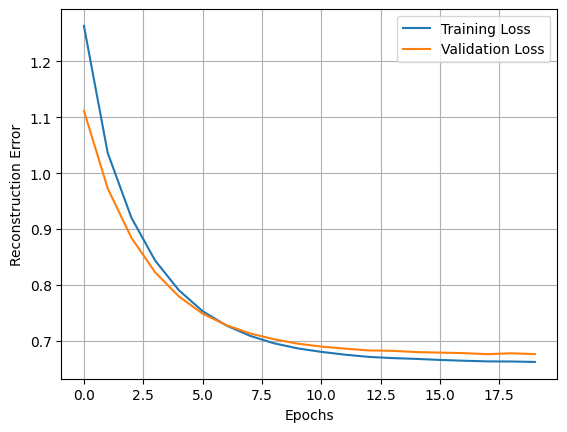

In [26]:
plt.grid()
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error')
plt.legend()

In [27]:
pred1 = model_1.predict(x_good)
score1 = metrics.mean_absolute_error(pred1,x_good)

pred2 = model_1.predict(x_good_val)
score2 = metrics.mean_absolute_error(pred2,x_good_val)

pred3 = model_1.predict(x_bad)
score3 = metrics.mean_absolute_error(pred3,x_bad)

print(f"Insample Good Score (MAE): {score1}".format(score1))
print(f"Out of Sample Good Score (MAE): {score2}".format(score2))
print(f"Bad sample Score (MAE): {score3}".format(score3))

71/71 [==============================] - 0s 4ms/step
Insample Good Score (MAE): 0.5183548105165707
Out of Sample Good Score (MAE): 0.5328015115133488
Bad sample Score (MAE): 0.5434494502175831


##### Results

In [28]:
encoded_inf = model_1.encoder(x_bad).numpy()
decoded_inf = model_1.decoder(encoded_inf).numpy()

In [29]:
#errors per region for model1 for frontal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'CEREBELLUM'))

FRONTAL:    0.3552251226675738
OCCIPITAL:  0.2568133850740846
TEMPORAL:   0.22652218676887248
PARIETAL:   0.26639807189589565


In [30]:
#errors per region for model1 for occipital atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'CEREBELLUM'))

FRONTAL:    0.2732852994829598
OCCIPITAL:  0.3766963542687002
TEMPORAL:   0.2723405646760688
PARIETAL:   0.23738388797542143


In [31]:
#errors per region for model1 for temporal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'CEREBELLUM'))

FRONTAL:    0.24871461636475925
OCCIPITAL:  0.2604130450976665
TEMPORAL:   0.48197959346506736
PARIETAL:   0.2518452285348027


In [32]:
#errors per region for model1 for parietal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'CEREBELLUM'))

FRONTAL:    0.2671524715095586
OCCIPITAL:  0.24040198580162317
TEMPORAL:   0.2750267134317187
PARIETAL:   0.4008187928821833


In [33]:
#errors per region for model1 for healthy subjects
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'CEREBELLUM'))

FRONTAL:    0.27508116742053795
OCCIPITAL:  0.2698337726589045
TEMPORAL:   0.28542317876049633
PARIETAL:   0.2607952390525709


In [34]:
#vanilla Autoencoder

column_list = test_df.columns.tolist()
bad_df = pd.DataFrame(x_bad, columns=column_list)
pred_df = model_1.predict(x_bad)
res_df = pred_df - bad_df
res_df[res_df < 0] = 0
res_df['atrophy pattern']= new_column_values

71/71 [==============================] - 0s 3ms/step


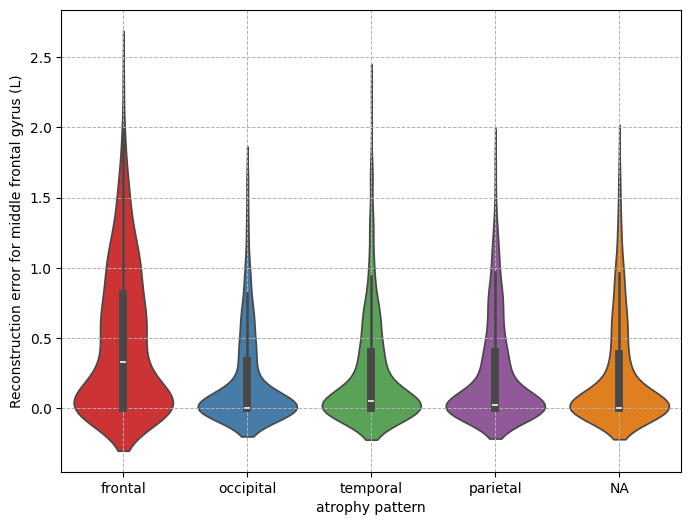

In [35]:
#violinplot frontal 1
my_pal_sex = sns.color_palette("Set1", 5)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_143', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.rcParams.update({'font.size': 14})
plt.ylabel('Reconstruction error for middle frontal gyrus (L)')

# Show the plot
plt.show()

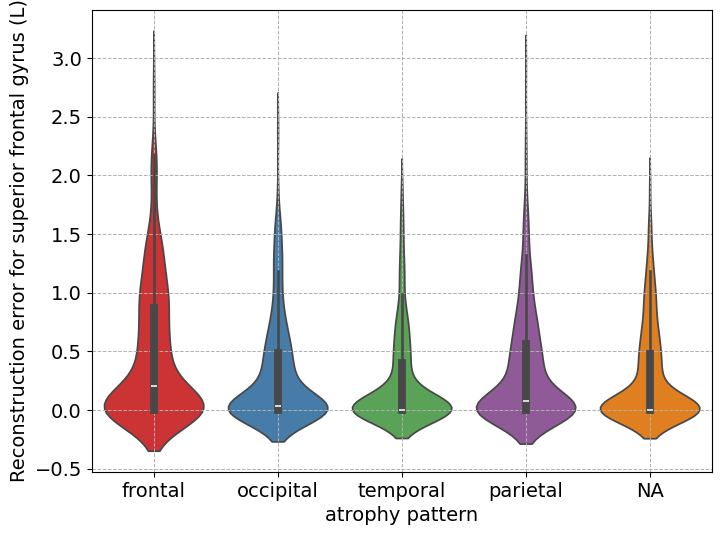

In [36]:
#violinplot frontal 2
my_pal_sex = sns.color_palette("Set1", 5)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))


sns.violinplot(y='MUSE_Volume_191', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for superior frontal gyrus (L)')

# Show the plot
plt.show()

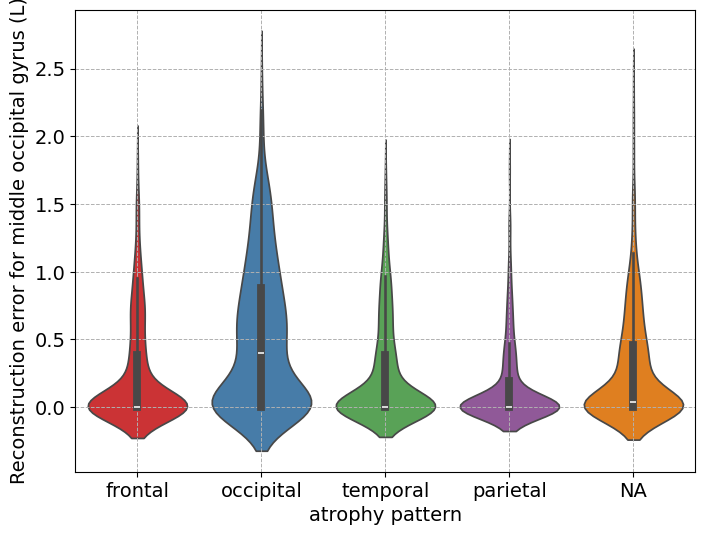

In [37]:
#violinplot occipital 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_145', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for middle occipital gyrus (L)')
plt.rcParams.update({'font.size': 14})
# Show the plot
plt.show()

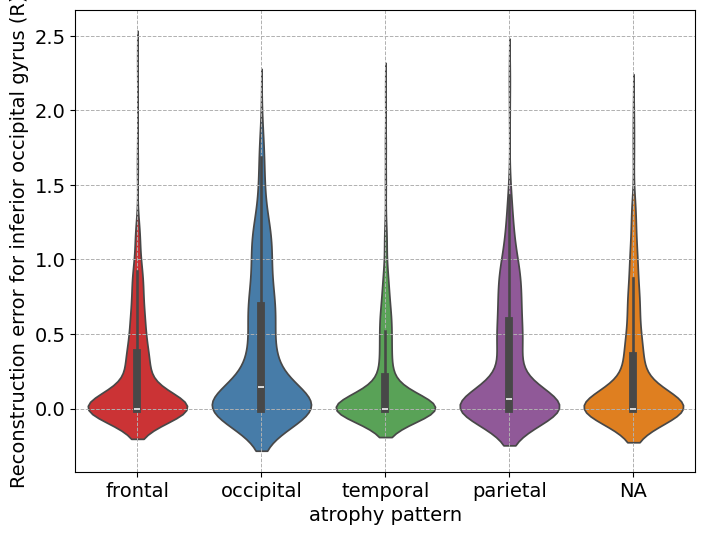

In [38]:
#violinplot occipital 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_128', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for inferior occipital gyrus (R)')
# Show the plot
plt.show()

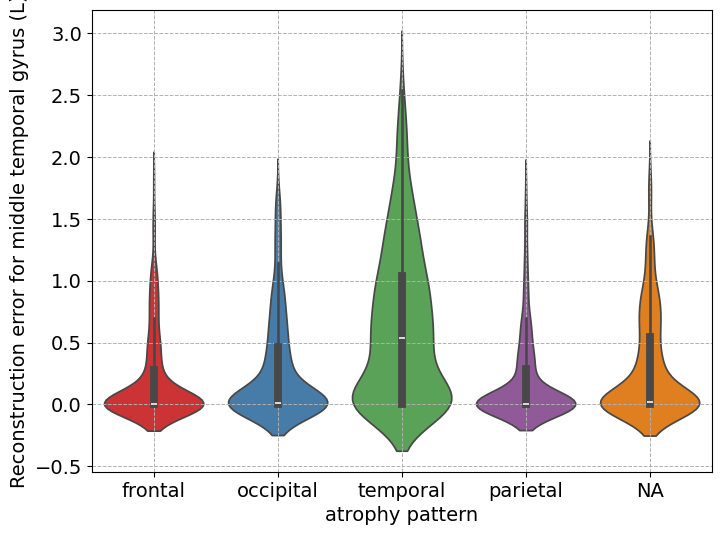

In [39]:
#violinplot temporal 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_155', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for middle temporal gyrus (L)')
plt.rcParams.update({'font.size': 13})

# Show the plot
plt.show()

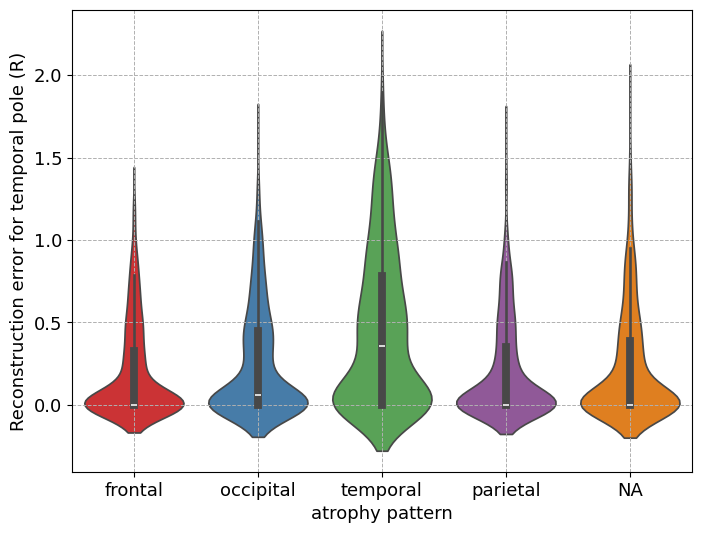

In [40]:
#boxplot temporal 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_202', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for temporal pole (R)')
# Show the plot
plt.show()

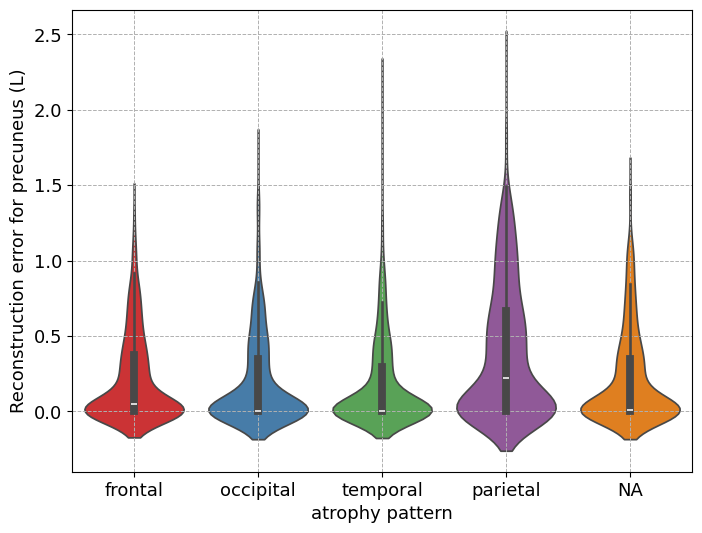

In [41]:
#boxplot parietal 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_169', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for precuneus (L)')
plt.rcParams.update({'font.size': 15})
# Show the plot
plt.show()

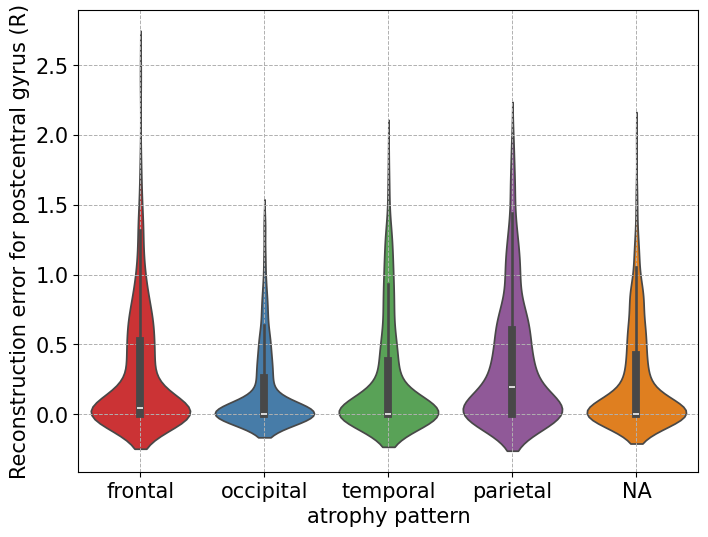

In [42]:
#boxplot parietal 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_176', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for postcentral gyrus (R)')

# Show the plot
plt.show()

#### Variational AE:

In [43]:
#Variational autoencoder implementation

# Define the encoder
latent_dim = 32  # This is the dimension of the latent space
input_shape = x_good.shape[1]  # Number of features in the dataset

inputs = layers.Input(shape=(input_shape,))
x = layers.Dense(100, activation='selu')(inputs)
x = layers.Dense(64, activation='selu')(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='selu')(latent_inputs)
x = layers.Dense(100, activation='selu')(x)
outputs = layers.Dense(input_shape, activation='linear')(x)

# Instantiate the encoder and decoder models
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
decoder = Model(latent_inputs, outputs, name='decoder')

# Instantiate the VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')


# Define the loss
reconstruction_loss = tf.keras.losses.mean_squared_error(inputs, outputs)
#reconstruction_loss *= input_shape

kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1)
kl_loss *= -0.5

vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

In [44]:
vae.compile(optimizer='adam')#, loss = 'mae')
history = vae.fit(x_good_train, x_good_train, 
                      verbose=1,
                      epochs=20,
                      batch_size=16,
                      validation_data=(x_good_val, x_good_val), shuffle=True)

Epoch 1/20
96/96 [==============================] - 3s 13ms/step - loss: 16.9523 - val_loss: 6.4812
Epoch 2/20
96/96 [==============================] - 1s 14ms/step - loss: 4.3990 - val_loss: 3.3113
Epoch 3/20
96/96 [==============================] - 1s 14ms/step - loss: 2.6368 - val_loss: 2.3134
Epoch 4/20
96/96 [==============================] - 1s 14ms/step - loss: 1.9874 - val_loss: 1.8660
Epoch 5/20
96/96 [==============================] - 1s 14ms/step - loss: 1.6667 - val_loss: 1.6202
Epoch 6/20
96/96 [==============================] - 1s 13ms/step - loss: 1.4891 - val_loss: 1.4668
Epoch 7/20
96/96 [==============================] - 1s 14ms/step - loss: 1.3734 - val_loss: 1.3736
Epoch 8/20
96/96 [==============================] - 1s 14ms/step - loss: 1.2965 - val_loss: 1.3042
Epoch 9/20
96/96 [==============================] - 1s 14ms/step - loss: 1.2441 - val_loss: 1.2497
Epoch 10/20
96/96 [==============================] - 1s 14ms/step - loss: 1.2066 - val_loss: 1.2126
Epoch 11

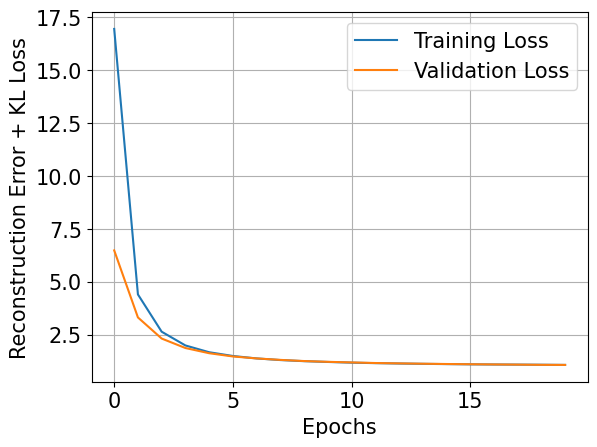

In [45]:
plt.grid()
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error + KL Loss')
plt.legend()

In [46]:
pred1 = vae.predict(x_good)
score1 = metrics.mean_absolute_error(pred1,x_good)

pred2 = vae.predict(x_good_val)
score2 = metrics.mean_absolute_error(pred2,x_good_val)

pred3 = vae.predict(x_bad)
score3 = metrics.mean_absolute_error(pred3,x_bad)

print(f"Insample Good Score (MAE): {score1}".format(score1))
print(f"Out of Sample Good Score (MAE): {score2}".format(score2))
print(f"Bad sample Score (MAE): {score3}".format(score3))

71/71 [==============================] - 0s 4ms/step
Insample Good Score (MAE): 0.7937325208084275
Out of Sample Good Score (MAE): 0.7867603465036342
Bad sample Score (MAE): 0.8097574399811727


##### Results:


In [47]:
#Variational Autoencoder
decoded_inf = vae.predict(x_bad)

71/71 [==============================] - 0s 4ms/step


In [48]:
#errors per region for VAE for frontal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'CEREBELLUM'))

FRONTAL:    0.7250694754338493
OCCIPITAL:  0.40033710058798067
TEMPORAL:   0.3938849210124243
PARIETAL:   0.4071757660036414


In [49]:
#errors per region for VAE for occipital atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'CEREBELLUM'))

FRONTAL:    0.3860194838865257
OCCIPITAL:  0.7007779554438298
TEMPORAL:   0.3798824622438099
PARIETAL:   0.38675284755859785


In [50]:
#errors per region for VAE for temporal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'CEREBELLUM'))

FRONTAL:    0.39209541361018474
OCCIPITAL:  0.392290180212035
TEMPORAL:   0.7415900318882219
PARIETAL:   0.39695023348619163


In [51]:
#errors per region for VAE for parietal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'CEREBELLUM'))

FRONTAL:    0.38666857629899504
OCCIPITAL:  0.3859975967882168
TEMPORAL:   0.38112640718877133
PARIETAL:   0.7485706363102641


In [52]:
#errors per region for VAE for healthy subjects
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'CEREBELLUM'))

FRONTAL:    0.38782992802586025
OCCIPITAL:  0.41567314830582175
TEMPORAL:   0.3908870438359888
PARIETAL:   0.40655120243038667


In [53]:
#variational Autoencoder

column_list = test_df.columns.tolist()
bad_df = pd.DataFrame(x_bad, columns=column_list)
pred_df = vae.predict(x_bad)

res_df = pred_df - bad_df
res_df[res_df < 0] = 0
res_df['atrophy pattern']= new_column_values

71/71 [==============================] - 0s 4ms/step


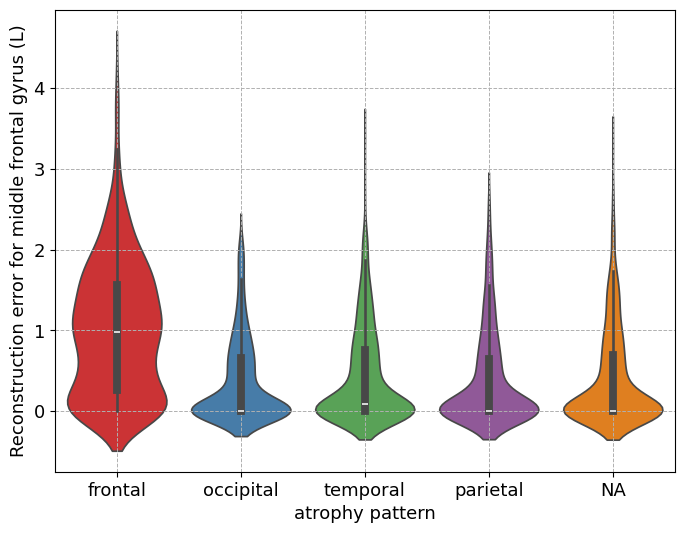

In [55]:
#violinplot frontal 1
my_pal_sex = sns.color_palette("Set1", 5)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_143', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for middle frontal gyrus (L)')
plt.rcParams.update({'font.size': 13})

# Show the plot
plt.show()

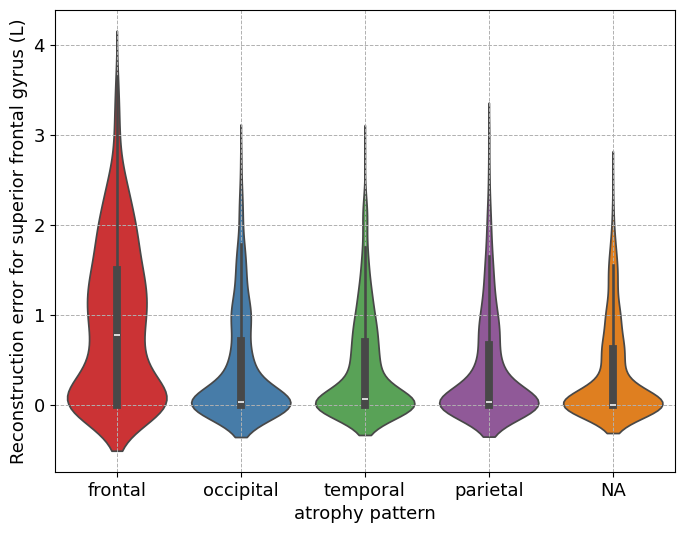

In [56]:
#violinplot frontal 2
my_pal_sex = sns.color_palette("Set1", 5)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_191', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for superior frontal gyrus (L)')

# Show the plot
plt.show()

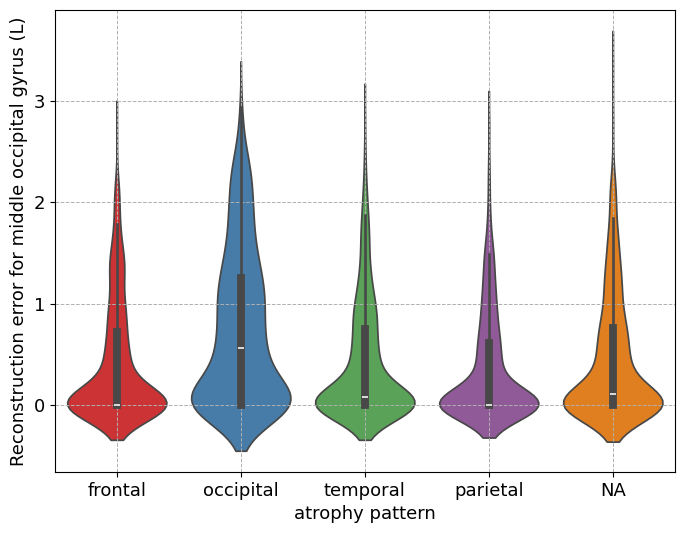

In [57]:
#violinplot occipital 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_145', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for middle occipital gyrus (L)')
# Show the plot
plt.show()

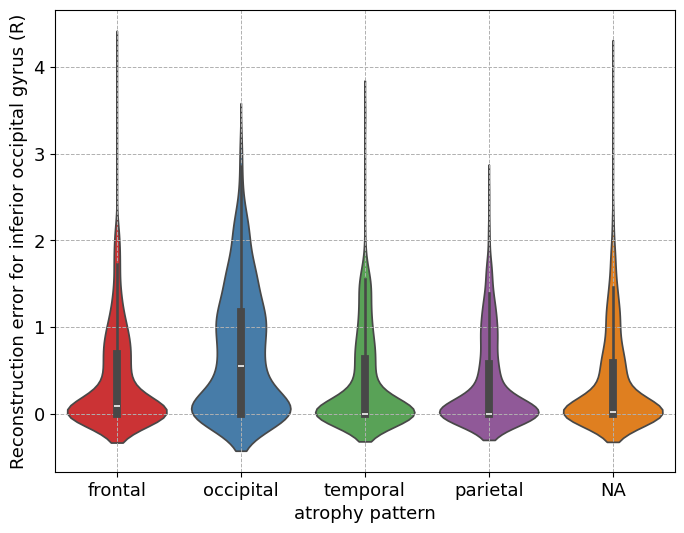

In [58]:
#violinplot occipital 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_128', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for inferior occipital gyrus (R)')
# Show the plot
plt.show()

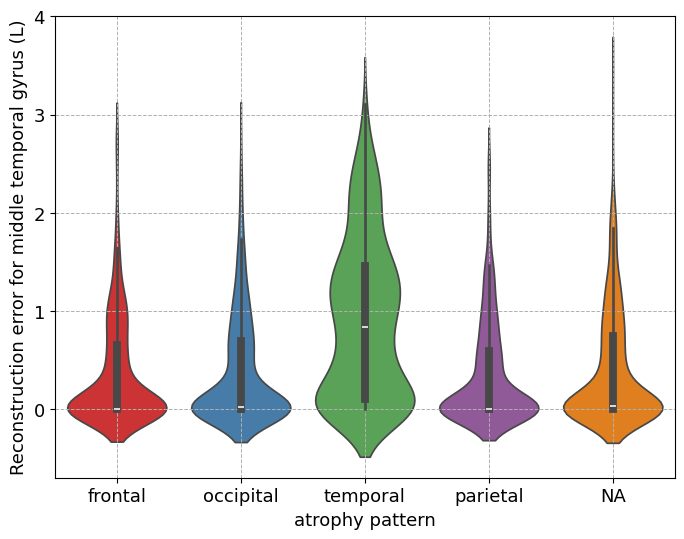

In [59]:
#violinplot temporal 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_155', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for middle temporal gyrus (L)')
# Show the plot
plt.show()

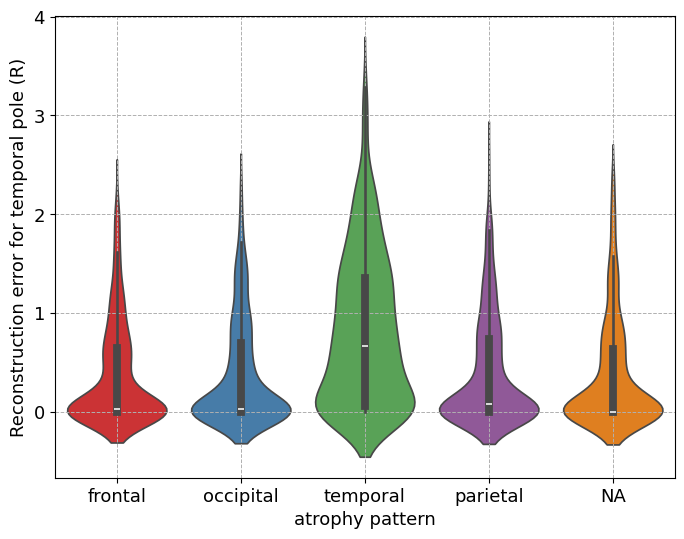

In [60]:
#violinplot temporal 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_202', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for temporal pole (R)')
# Show the plot
plt.show()

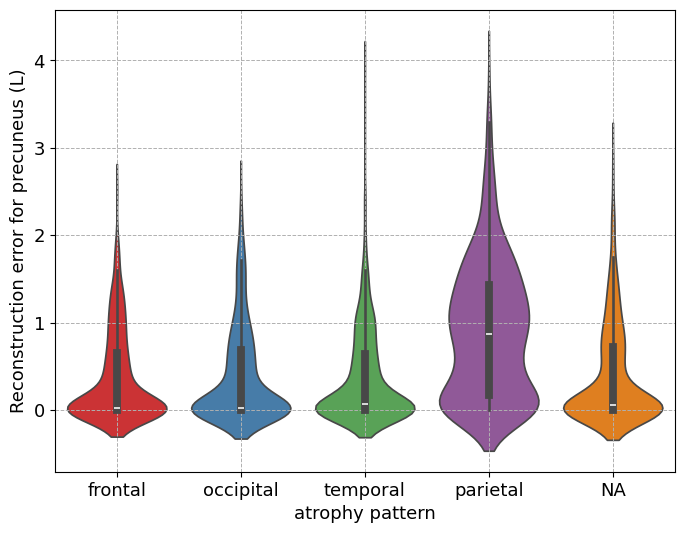

In [61]:
#violinplot parietal 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_169', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for precuneus (L)')

# Show the plot
plt.show()

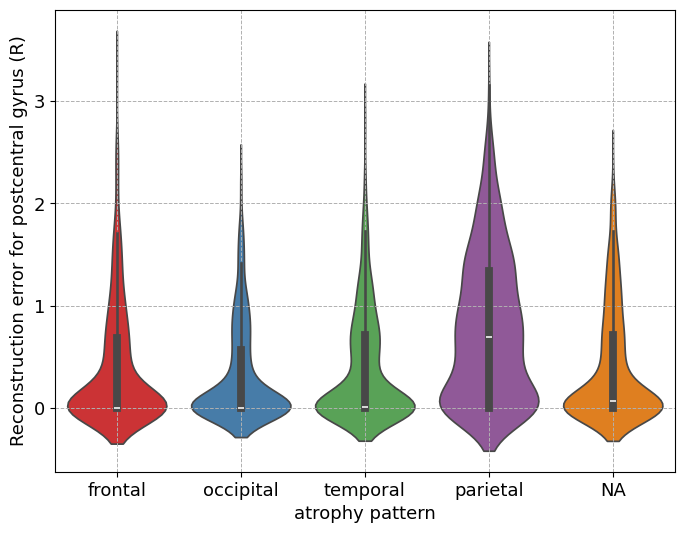

In [62]:
#violinplot parietal 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_176', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for postcentral gyrus (R)')

# Show the plot
plt.show()

##### end

In [ ]:


# Plot the clusters with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.6, edgecolor='w')

# Plot the centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75, marker='X')

plt.title('Cluster Visualization with K-Means (Seaborn)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [46]:
encoded_inf = model_1.encoder(x_good_val).numpy()
#encoded_inf = model_1.encoder(np.reshape(x_bad[0], (1, 119))).numpy()
decoded_inf = model_1.decoder(encoded_inf).numpy()

In [47]:
print("FRONTAL:   ", mae_region(x_good_val, decoded_inf, 'FRONTAL'))
print("OCCIPITAL:   ", mae_region(x_good_val, decoded_inf, 'OCCIPITAL'))
print("TEMPORAL:   ", mae_region(x_good_val, decoded_inf, 'TEMPORAL'))
print("PARIETAL:   ", mae_region(x_good_val, decoded_inf, 'PARIETAL'))
print("DEEP_WM_GM:   ", mae_region(x_good_val, decoded_inf, 'DEEP_WM_GM'))
print("LIMBIC:   ", mae_region(x_good_val, decoded_inf, 'LIMBIC'))
print("CEREBELLUM:   ", mae_region(x_good_val, decoded_inf, 'CEREBELLUM'))

FRONTAL:    0.30088424548512865
OCCIPITAL:    0.3220558915696343
TEMPORAL:    0.3346014995176166
PARIETAL:    0.3076460612117669
DEEP_WM_GM:    0.26103057263947377
LIMBIC:    0.28523477133672764
CEREBELLUM:    0.31608650534663835


In [ ]:
# check for statistical significant atrophy in frontal sub-dataset
from scipy.stats import ttest_ind
for j in range(frontal_lower_limit, frontal_upper_limit + 1):
    col1 = df.iloc[:, j]  # Use iloc to access columns by positional index
    col2 = [test_df.iloc[i, j] for i in range(1,21)]
    t_statistic, p_value = ttest_ind(col1, col2, nan_policy='omit')
    print(f"T-test between column {j} of goof_df and test_df:")
    print(f"  T-statistic: {t_statistic}")
    print(f"  P-value: {p_value}")

In [45]:
encoded_inf = model_3.encoder(x_bad).numpy()
#encoded_inf = model_1.encoder(np.reshape(x_bad[0], (1, 119))).numpy()
decoded_inf = model_3.decoder(encoded_inf).numpy()

#results per region for model3
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(1,21)]), np.array([decoded_inf[i,:] for i in range(1,21)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(x_bad, decoded_inf, 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1,801)]), np.array([decoded_inf[i,:] for i in range(1,801)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(21,41)]), np.array([decoded_inf[i,:] for i in range(21,41)]), 'PARIETAL'))
print("DEEP_WM_GM:", mae_region(x_bad, decoded_inf, 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(41,61)]), np.array([decoded_inf[i,:] for i in range(41,61)]), 'LIMBIC'))
print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(61,81)]), np.array([decoded_inf[i,:] for i in range(61,81)]), 'CEREBELLUM'))

FRONTAL:    0.5696880488587155
OCCIPITAL:  0.1714858809137822
TEMPORAL:   0.16969444079066762
PARIETAL:   0.567539001188527
DEEP_WM_GM: 0.23669722322885062
LIMBIC:     0.37402784267711014
CEREBELLUM: 0.5063443538349844


In [46]:
#temp vectors to plot frontal region 
t1 = [decoded_inf[i,j] for i in range(1,21) for j in range(x_bad.shape[1])]
t1_2d = np.reshape(t1, (20,x_bad.shape[1]))
t2 = [x_bad[i,j] for i in range(1,21) for j in range(x_bad.shape[1])]
t2_2d = np.reshape(t2, (20, x_bad.shape[1]))

In [ ]:
#reconstruaction_err = np.mean(abs(np.reshape([tf.keras.losses.mae(x_bad[i,j],decoded_inf[i,j]) for i in range(1,21) for j in range(x_bad.shape[1])], (20,x_bad.shape[1]))))

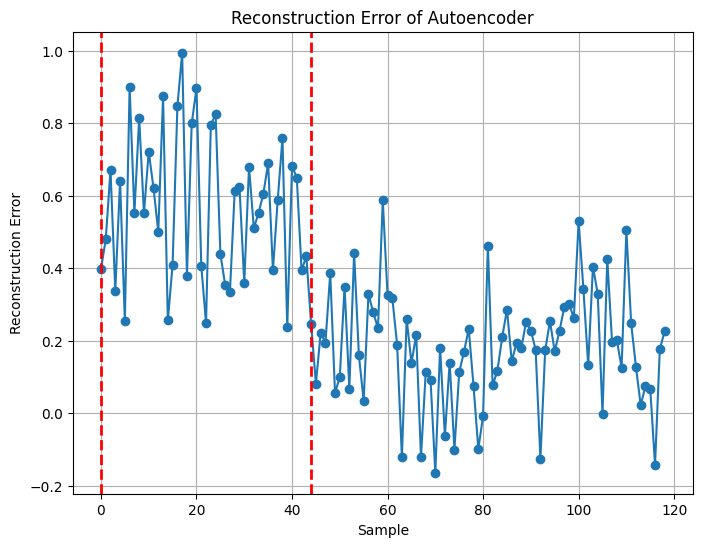

In [47]:
# Calculate reconstruction error for each input sample
#reconstruction_error_bad = [tf.keras.losses.mae(x_bad[i,:],decoded_inf[i,:]) for i in range(21,41)]
#reconstruction_error = tf.keras.losses.mae(t1_2d,t2_2d)
reconstruction_error = np.mean(t1_2d - t2_2d,axis=0)
# Plot the reconstruction error
plt.figure(figsize=(8, 6))
plt.plot(reconstruction_error, marker='o', linestyle='-')
plt.xlabel('Sample')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error of Autoencoder')
plt.grid(True)
plt.axvline(x=frontal_lower_limit, color='r', linestyle='--', linewidth=2)
plt.axvline(x=frontal_upper_limit+1, color='r', linestyle='--', linewidth=2)

plt.show()

29/29 [==============================] - 0s 4ms/step


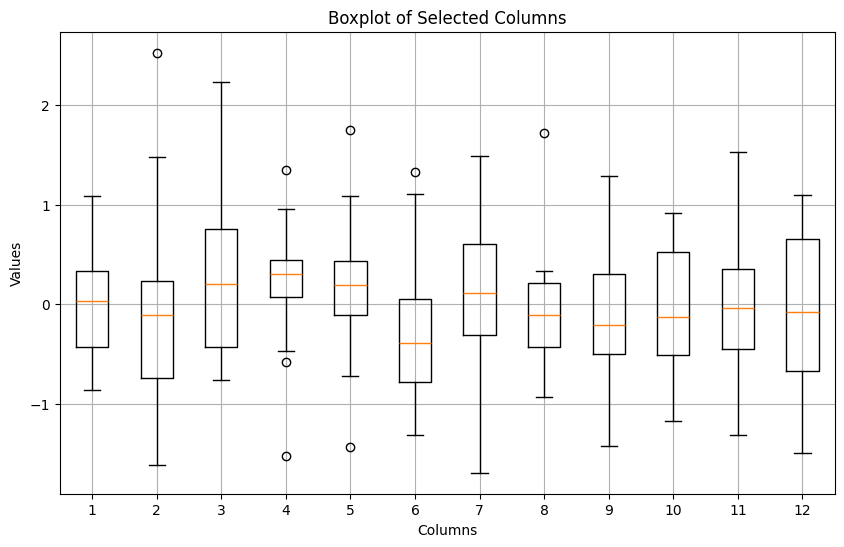

In [51]:
#boxplot for parietal subgroup predicted from model3
start_index = parietal_lower_limit
end_index = parietal_upper_limit
columns_to_plot_1 = x_bad[1:21, start_index:end_index + 1]
columns_to_plot_2 = model_3.predict(x_bad)[21:41, start_index:end_index + 1]
# Plot boxplots for the selected columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
#df[columns_to_plot].boxplot()
#plt.boxplot(columns_to_plot_2)
plt.boxplot(columns_to_plot_1)
plt.grid()
plt.xlabel('Columns')  # Adjust x-axis label as needed
plt.ylabel('Values')   # Adjust y-axis label as needed
plt.title('Boxplot of Selected Columns')  # Adjust title as needed
plt.show()